<a href="https://colab.research.google.com/github/JSJeong-me/CCTV/blob/main/yolov5-bus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!ls -l

total 8
drwx------ 5 root root 4096 Mar 17 05:35 drive
drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data


# Setup

Clone repo, install dependencies, `%cd` into `./yolov5` folder and check GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5

import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# 1. Inference

Run inference with a pretrained checkpoint on contents of `/inference/images` folder. Models are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content/yolov5


In [5]:
!cp /content/drive/MyDrive/yolo5/bus832.pt .

In [12]:
%cd yolov5

/content/yolov5


In [8]:
!mkdir test

In [10]:
!cp /content/drive/MyDrive/yolo5/test/images/* /content/test

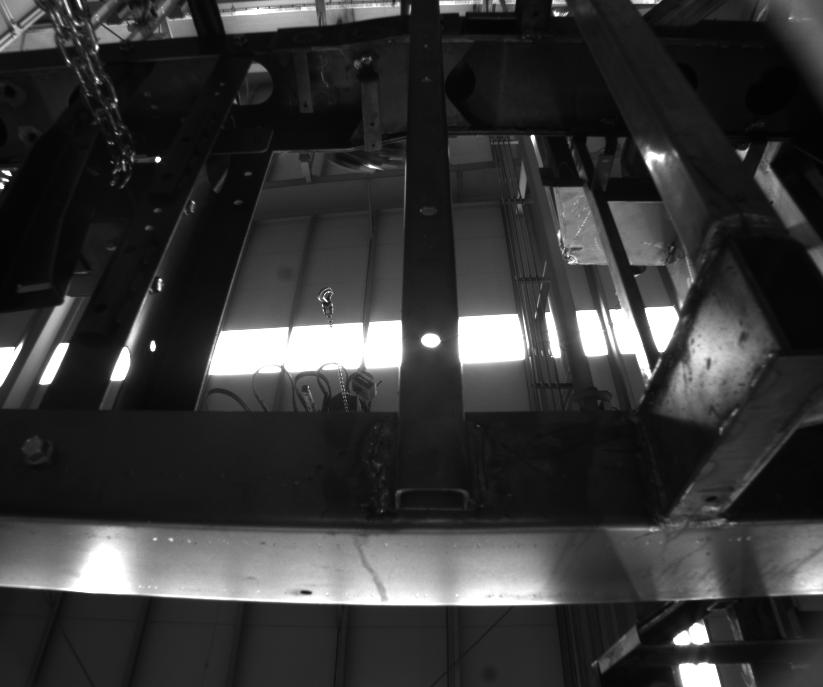

In [11]:
Image(filename='/content/test/2_104449_11_32_png.rf.a1b1e7bcefef7540b5410540e652eb9d.jpg', width=600)

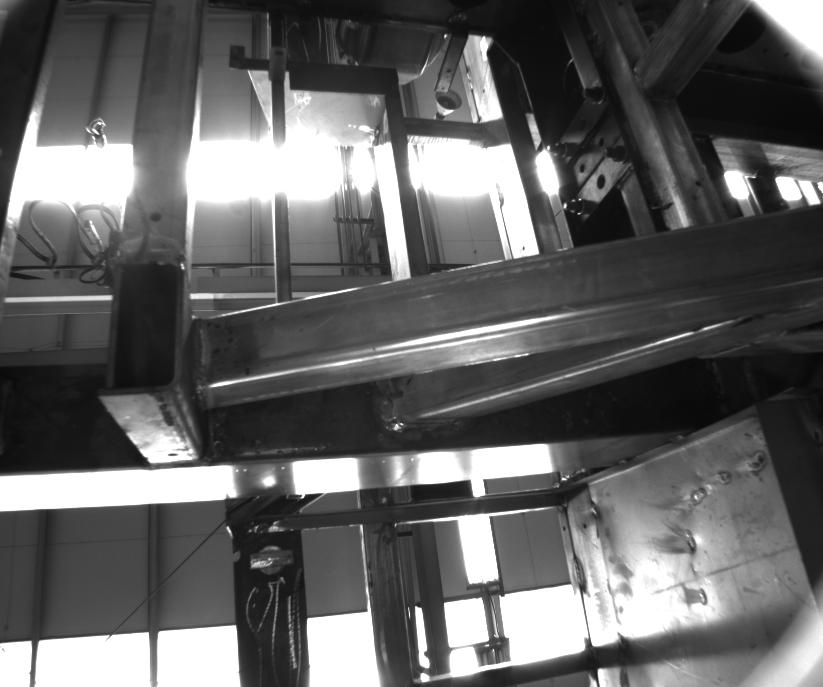

In [19]:
Image(filename='/content/test/2_112206_11_33_png.rf.005cef0aa4d3a6ca7f5916142ac8764f.jpg', width=600)

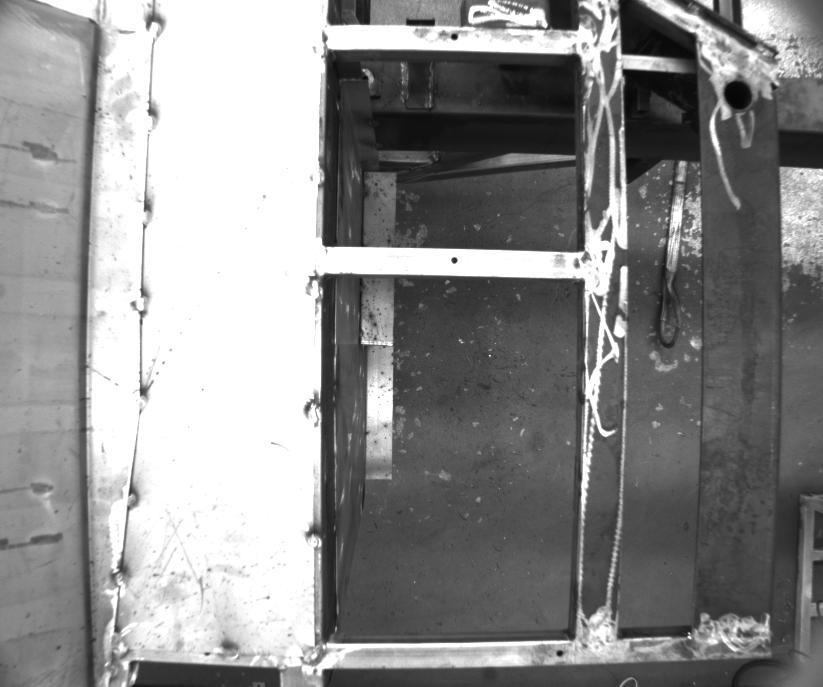

In [20]:
Image(filename='/content/test/2_112206_11_63_png.rf.075211304f00221a75e37e6c7c6b94e3.jpg', width=600)

In [14]:
!python detect.py --weights bus832.pt --img 416 --conf 0.4 --source ../test/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../test/', update=False, view_img=False, weights=['bus832.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 400 layers, 47396972 parameters, 0 gradients
image 1/15 /content/yolov5/../test/2_104449_11_32_png.rf.a1b1e7bcefef7540b5410540e652eb9d.jpg: 352x416 14 bolts, 4 brackets, 2 holes, 5 weldings, Done. (0.022s)
image 2/15 /content/yolov5/../test/2_112206_11_33_png.rf.005cef0aa4d3a6ca7f5916142ac8764f.jpg: 352x416 8 bolts, 3 brackets, 6 holes, 4 weldings, Done. (0.021s)
image 3/15 /content/yolov5/../test/2_112206_11_63_png.rf.075211304f00221a75e37e6c7c6b94e3.jpg: 352x416 4 bolts, 1 plate, Done. (0.021s)
image 4/15 /content/yolov5/../test/2_113949_11_62_png.rf.f7bd170b8d5a0617e46e3d7599d5ad0d.jpg: 352x416 12 bolts, 5 br

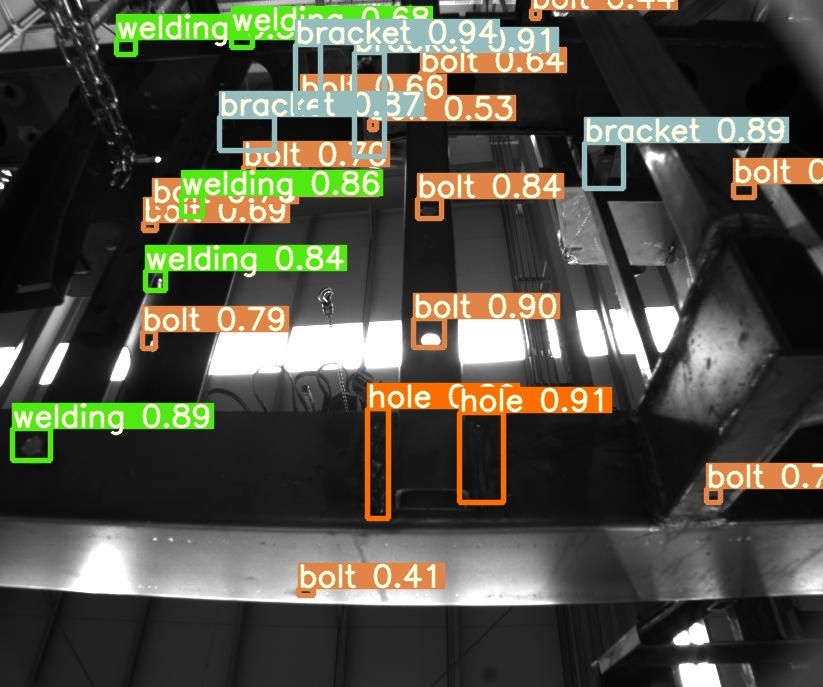

In [15]:
Image(filename='/content/yolov5/runs/detect/exp2/2_104449_11_32_png.rf.a1b1e7bcefef7540b5410540e652eb9d.jpg', width=600)

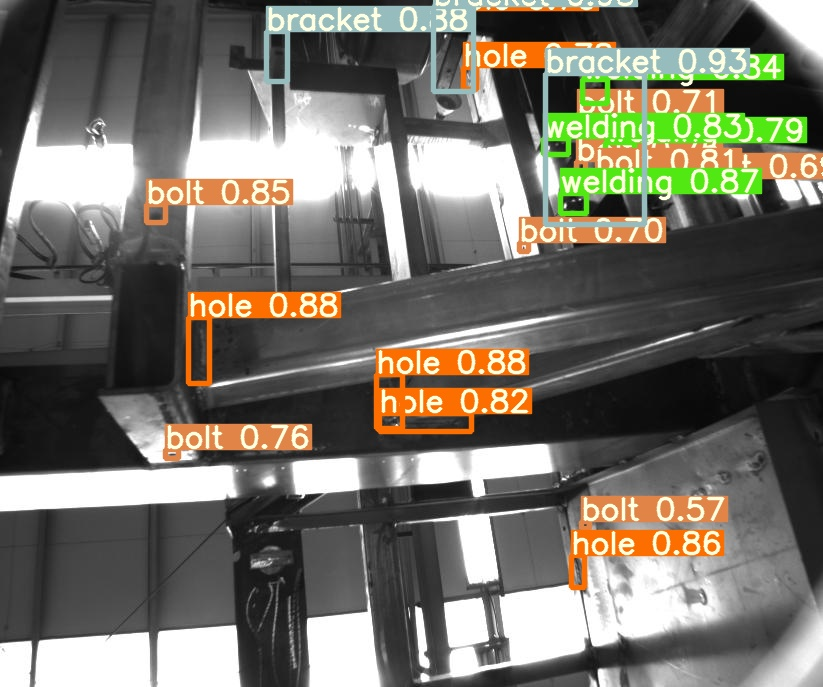

In [16]:
Image(filename='/content/yolov5/runs/detect/exp2/2_112206_11_33_png.rf.005cef0aa4d3a6ca7f5916142ac8764f.jpg', width=600)

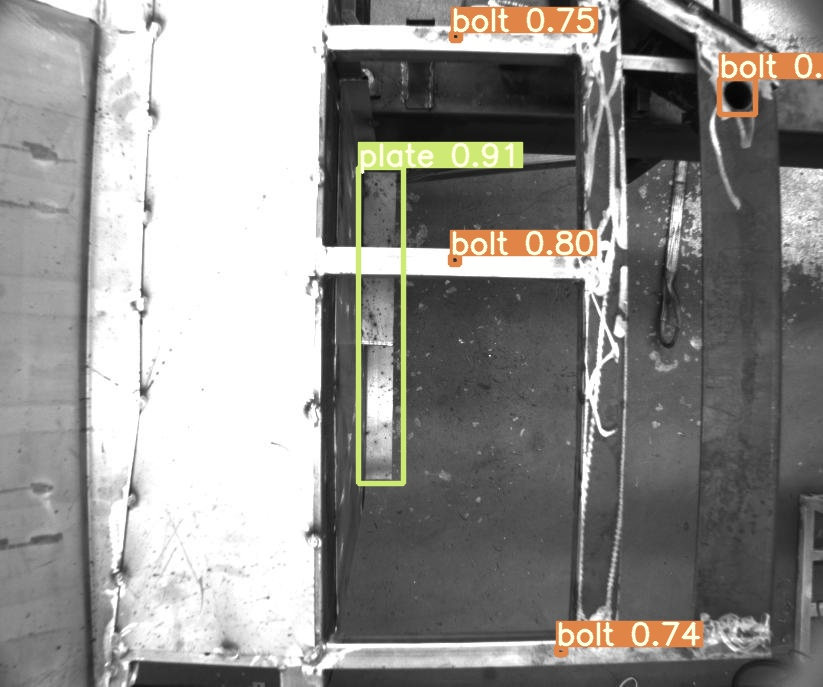

In [17]:
Image(filename='/content/yolov5/runs/detect/exp2/2_112206_11_63_png.rf.075211304f00221a75e37e6c7c6b94e3.jpg', width=600)

Inference can be run on a variety of sources: images, videos, directories, webcams, rtsp and http streams as shown in the example below.

In [ ]:
!python detect.py --source 'inference/images/20201009_0.mp4' --conf-thres 0.30

In [ ]:
!python detect.py --source '20201102.mp4' --conf-thres 0.3

In [ ]:
#!python detect.py --source 1

In [ ]:
!python detect.py --weights 10-10-web-best.pt --source 'inference/images/2020-10-11-web-rpa.mp4' --conf-thres 0.3

In [ ]:
# Example syntax (do not run cell)
!python detect.py --weights yolov5s.pt  --source 'inference/images/20201009_1.mp4' --conf-thres 0.3 # video

In [ ]:
!python detect.py --weights yolov5s.pt --source 'giraffe.jpg' --conf-thres 0.3

In [ ]:
# Example syntax (do not run cell)
!python detect.py --source file.jpg  # image 
                           file.mp4  # video
                           dir/  # directory
                           0  # webcam
                           'rtsp://170.93.143.139/rtplive/470011e600ef003a004ee33696235daa' # rtsp
                           'http://112.50.243.8/PLTV/88888888/224/3221225900/1.m3u8'  # http

# 2. Test
Test a model on COCO val or test-dev dataset to determine trained accuracy. Models are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

### 2.1 val2017
Download COCO val 2017 dataset, 1GB, 5000 images, and test model accuracy.

In [ ]:
# Download COCO val2017
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

In [ ]:
# Run YOLOv5x on COCO val2017
!python test.py --weights yolov5x.pt --data coco.yaml --img 672

### 2.2 test-dev2017
Download COCO test2017 dataset, 7GB, 40,000 images, to test model accuracy on test-dev set, 20,000 images. Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
gdrive_download('1cXZR_ckHki6nddOmcysCuuJFM--T-Q6L','coco2017labels.zip')  # annotations
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
!mv ./test2017 ./coco/images && mv ./coco ../  # move images into /coco and move /coco alongside /yolov5

In [ ]:
# Run YOLOv5s on COCO test-dev2017 with argument --task test
!python test.py --weights yolov5s.pt --data ./data/coco.yaml --task test

# 3. Train

Download https://www.kaggle.com/ultralytics/coco128, a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (actual training is much longer, around **300-1000 epochs**, depending on your dataset).

In [ ]:
# Download coco128
gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')  # coco128 dataset
!mv ./coco128 ../  # move folder alongside /yolov5

Train a YOLOv5s model on coco128 by specifying model config file `--cfg models/yolo5s.yaml`, and dataset config file `--data data/coco128.yaml`. Start training from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights ''`. Pretrained weights are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

**All training results are saved to `runs/exp0`** for the first experiment, then `runs/exp1`, `runs/exp2` etc. for subsequent experiments.


In [ ]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# Train YOLOv5s on coco128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 30 --data coco128.yaml --cfg yolov5s.yaml --weights yolov5s.pt --nosave --cache

# 4. Visualize

View `runs/exp0/train*.jpg` images to see training images, labels and augmentation effects. A **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

In [ ]:
Image(filename='runs/exp0/train_batch1.jpg', width=900)  # view augmented training mosaics

View `test_batch0_gt.jpg` to see test batch 0 *ground truth* labels.

In [ ]:
Image(filename='runs/exp0/test_batch0_gt.jpg', width=900)  # view test image labels

View `test_batch0_pred.jpg` to see test batch 0 *predictions*.

In [ ]:
Image(filename='runs/exp0/test_batch0_pred.jpg', width=900)  # view test image predictions

Training losses and performance metrics are saved to Tensorboard and also to a `runs/exp0/results.txt` logfile. `results.txt` is plotted as `results.png` after training completes. Partially completed `results.txt` files can be plotted with `from utils.general import plot_results; plot_results()`. Here we show YOLOv5s trained on coco128 to 300 epochs, starting from scratch (blue), and from pretrained `yolov5s.pt` (orange).

In [ ]:
from utils.general import plot_results; plot_results()  # plot results.txt files as results.png

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including CUDA/CUDNN, Python and PyTorch preinstalled):

- **Google Colab Notebook** with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
- **Kaggle Notebook** with free GPU: [https://www.kaggle.com/ultralytics/yolov5](https://www.kaggle.com/ultralytics/yolov5)
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart) 
- **Docker Image** https://hub.docker.com/r/ultralytics/yolov5. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) ![Docker Pulls](https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker)

# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Re-clone repo
%cd ..
!rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
# Test GCP ckpt
%%shell
for x in best*
do
  gsutil cp gs://*/*/*/$x.pt .
  python test.py --weights $x.pt --data coco.yaml --img 672
done

In [ ]:
# YOLOv5 unit tests
%%shell
cd .. && rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5 && cd yolov5
export PYTHONPATH="$PWD" # to run *.py. files in subdirectories
pip install -qr requirements.txt onnx
python3 -c "from utils.google_utils import *; gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f', 'coco128.zip')" && mv ./coco128 ../
for x in yolov5s #yolov5m yolov5l yolov5x # models
do
  python train.py --weights $x.pt --cfg $x.yaml --epochs 4 --img 320 --device 0  # train
  for di in 0 cpu # inference devices
  do
    python detect.py --weights $x.pt --device $di  # detect official
    python detect.py --weights runs/exp0/weights/last.pt --device $di  # detect custom
    python test.py --weights $x.pt --device $di # test official
    python test.py --weights runs/exp0/weights/last.pt --device $di # test custom
  done
  python models/yolo.py --cfg $x.yaml # inspect
  python models/export.py --weights $x.pt --img 640 --batch 1 # export
done